# 1 Noisy Case

In [1]:
import sys
sys.path.append('..')

In [26]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import generator

%config InlineBackend.figure_format='retina'

## 1.1 Non-Noisy Sanity Check

In [27]:
FEATURES = 100
SAMPLES = 40000
THETA = 0.3

observations, true_dictionary, true_samples = \
    generator.random_dictionary_learning_instance(
        FEATURES, SAMPLES, THETA)

In [28]:
ITERATIONS = 30

observation_matches = []
true_matches = []
observation_opt = 3 * FEATURES * SAMPLES * THETA
true_opt = FEATURES

updates = generator.get_dictionary_learning_iterates(observations)
for current in itertools.islice(updates, ITERATIONS):
    # || A (D_o X_o) ||_4^4
    value = generator.sum_of_fourth_powers(current @ observations) 
    observation_matches.append(value / observation_opt)
    # || A D_o ||_4^4
    value = generator.sum_of_fourth_powers(current @ true_dictionary)
    true_matches.append(value / true_opt)

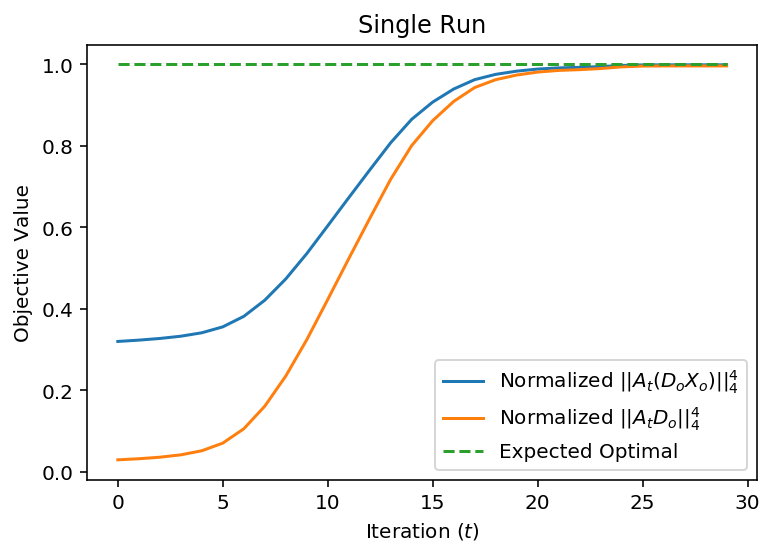

In [29]:
scale = np.arange(ITERATIONS)
plt.plot(scale, observation_matches)
plt.plot(scale, true_matches)
plt.plot(scale, np.ones(ITERATIONS), linestyle='--')

plt.title('Single Run')
plt.xlabel('Iteration ($t$)')
plt.ylabel('Objective Value')
plt.legend([
    'Normalized $|| A_t (D_o X_o) ||_4^4$',
    'Normalized $|| A_t D_o||_4^4$',
    'Expected Optimal'])
plt.show()

## 2.2 Noisy Case
### 2.2.1 Single Run

In [30]:
NOISE_SCALE = 0.6

observations, true_dictionary, true_samples = \
    generator.random_dictionary_learning_instance(
        FEATURES, SAMPLES, THETA)
noisy_observations = observations + np.random.normal(
    scale=NOISE_SCALE,
    size=observations.shape)

In [31]:
ITERATIONS = 150

observation_matches = []
clean_matches = []
true_matches = []

observation_opt = SAMPLES * FEATURES * (3 * THETA 
    + 6 * THETA * NOISE_SCALE ** 2 
    + 3 * NOISE_SCALE ** 4)
clean_opt = 3 * FEATURES * SAMPLES * THETA
true_opt = FEATURES

updates = generator.get_dictionary_learning_iterates(noisy_observations)
for current in itertools.islice(updates, ITERATIONS):
    # || A (D_o X_o + N) ||_4^4
    value = generator.sum_of_fourth_powers(current @ noisy_observations)
    observation_matches.append(value / observation_opt)
    # || A (D_o X_o) ||_4^4
    value = generator.sum_of_fourth_powers(current @ observations)
    clean_matches.append(value / clean_opt)
     # || A D_o ||_4^4
    value = generator.sum_of_fourth_powers(current @ true_dictionary)
    true_matches.append(value / true_opt)

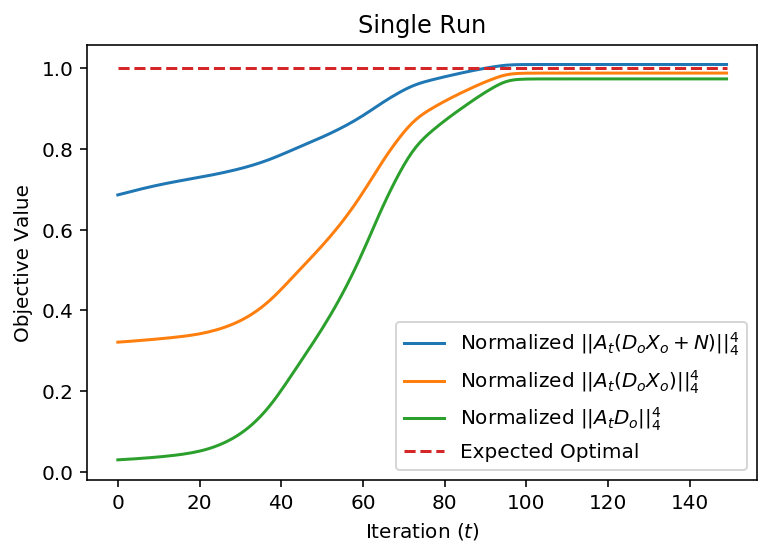

In [32]:
scale = np.arange(ITERATIONS)
plt.plot(scale, observation_matches)
plt.plot(scale, clean_matches)
plt.plot(scale, true_matches)
plt.plot(scale, np.ones(ITERATIONS), linestyle='--')

plt.title('Single Run')
plt.xlabel('Iteration ($t$)')
plt.ylabel('Objective Value')
plt.legend([
    'Normalized $|| A_t (D_o X_o + N) ||_4^4$',
    'Normalized $|| A_t (D_o X_o) ||_4^4$',
    'Normalized $|| A_t D_o ||_4^4$',
    'Expected Optimal']
)
plt.show()

In [34]:
true_matches

[0.029415272430120366,
 0.02996235472351434,
 0.03054733132930836,
 0.031169841877293224,
 0.03182960827490709,
 0.032526605325075016,
 0.033261242529600915,
 0.03403455773436076,
 0.03484842662375294,
 0.03570579496185971,
 0.0366109432364685,
 0.037569796381173054,
 0.03859029438804169,
 0.03968284159292766,
 0.040860850068794814,
 0.04214137978345908,
 0.043545844301833725,
 0.04510067962500304,
 0.04683774744903216,
 0.04879406330427079,
 0.051010277340426374,
 0.05352742167012954,
 0.05638217485791843,
 0.059602493615106125,
 0.06320703794209347,
 0.06721100890580323,
 0.07163644162387456,
 0.07652009326743098,
 0.08191285975456519,
 0.08787132082527849,
 0.09444782739679361,
 0.10168564716171319,
 0.10962135729098545,
 0.11829159376485046,
 0.12773817386072742,
 0.13800593843281647,
 0.14913135881721318,
 0.161125042025867,
 0.17395485268647762,
 0.1875367894997774,
 0.20173847148791302,
 0.21639640539531663,
 0.23134371526774938,
 0.2464402367629558,
 0.2615943744075131,
 0.2767

### 2.1.1 MSP on Noisy Observations

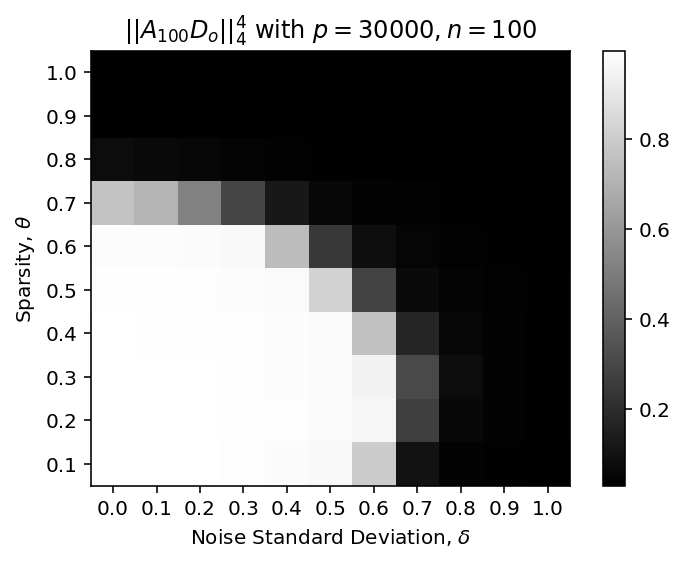

In [95]:
color_grid = np.zeros((
    len(sparsity_list),
    len(noise_scale_list)))

for entry in sparsity_and_noise_results:
    row = np.where(sparsity_list == entry['theta'])[0][0]
    col = np.where(noise_scale_list == entry['noise_scale'])[0][0]
    color_grid[row][col] = entry['value']

color_grid = np.flip(color_grid, 0)

plt.imshow(color_grid, cmap='gray')
plt.xticks(
    np.arange(len(noise_scale_list)),
    np.round(noise_scale_list, 1))
plt.yticks(
    np.arange(len(sparsity_list)),
    np.flip(np.round(sparsity_list, 1))
)

plt.title('$||A_{100} D_o||_4^4$ with $p = 30000, n = 100$')
plt.xlabel('Noise Standard Deviation, $\delta$')
plt.ylabel('Sparsity, $\\theta$')
plt.colorbar()
plt.show()